# # Industry and Wealth Clustering Analysis

 Introduction:
    In this project, we will perform clustering analysis on a dataset of billionaires to identify patterns and groupings based on their industries and wealth levels. Clustering is a technique used to group similar data points together, which can help us understand the structure of the data and identify potential relationships between variables.

 Dataset Information:
    The dataset we will use is the "Billionaires Statistics Dataset (2023)" from Kaggle. It contains information on various billionaires, including their name net worth, age, country, and industry.

Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

Hugging Face: https://huggingface.co/spaces/alperugurcan/Billionaires-Clustering-Analysis

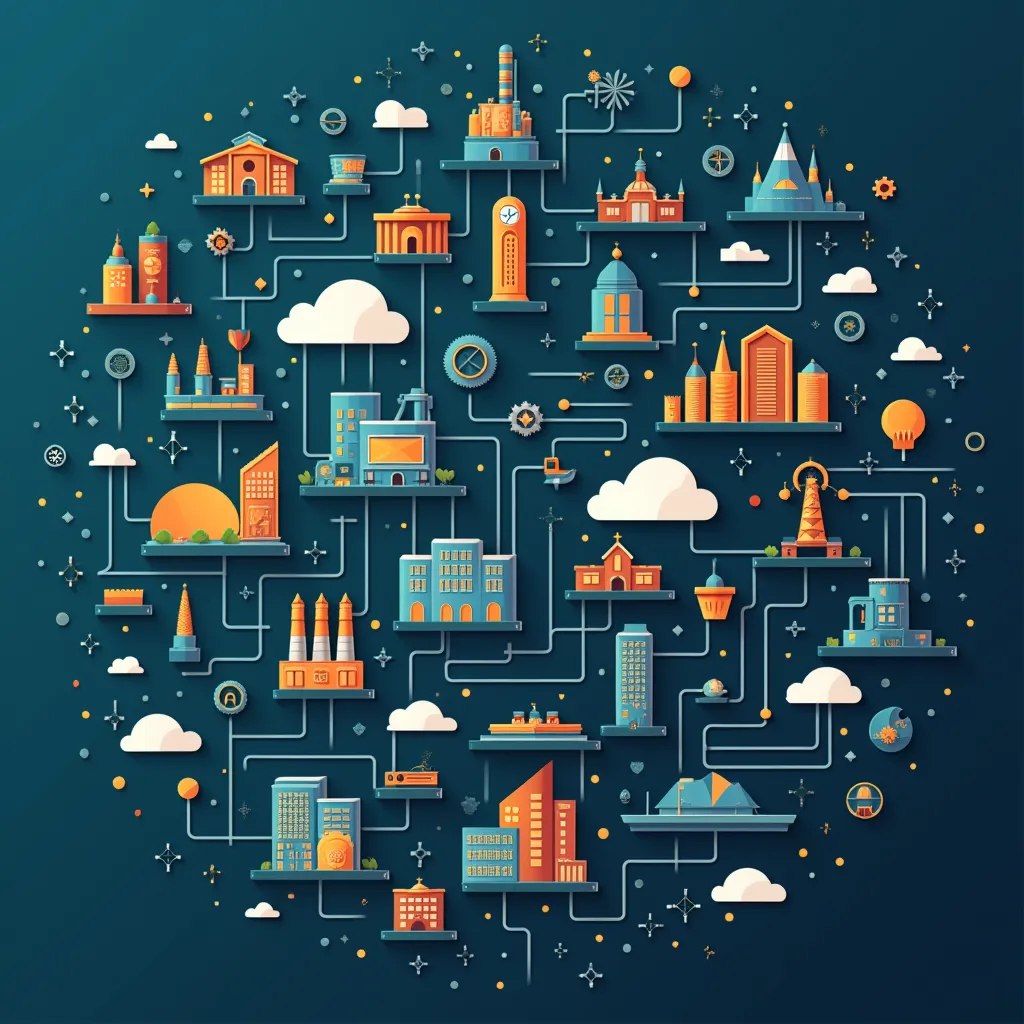

## 1. Data Preparation and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from gower import gower_matrix
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# Load and explore data
df = pd.read_csv('Billionaires Statistics Dataset.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [3]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [4]:
features = ['finalWorth', 'category']
df = df.dropna(subset=features) # Drop rows with missing values in 'finalWorth' and 'category'

In [5]:
scaler = StandardScaler()
df['finalWorth_scaled'] = scaler.fit_transform(df[['finalWorth']]) # Scale 'finalWorth'

In [6]:
# If the dataset is too large, take a sample
if df.shape[0] > 1000:
    df = df.sample(n=1000, random_state=42)
    print(f"Sampled dataset size: {df.shape}")


Sampled dataset size: (1000, 36)


In [7]:
X = df[['finalWorth_scaled', 'category']] # Prepare data for clustering


## 2. Clustering Analysis

c:\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
c:\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
c:\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4

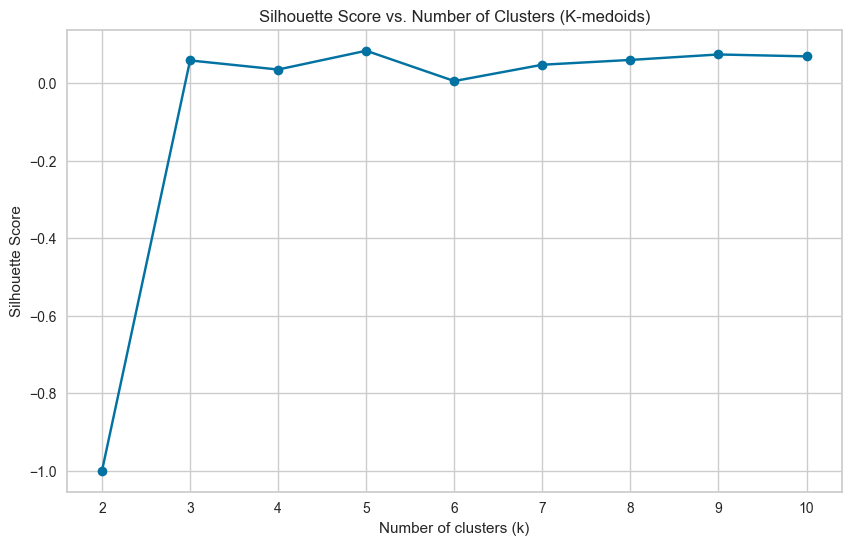

Optimal number of clusters (K-medoids): 5


c:\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
c:\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
c:\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
c:\Python310\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(


In [8]:
# Try Gower distance and K-medoids
try:
    # Calculate Gower distance matrix
    gower_dist = gower_matrix(X)

    # Function to perform K-medoids clustering and return silhouette score
    def kmedoids_gower(k): 
        kmedoids = KMedoids(n_clusters=k, metric='precomputed', random_state=42) # K-medoids clustering
        clusters = kmedoids.fit_predict(gower_dist) # Fit and predict clusters
        if len(np.unique(clusters)) > 1: # Check if more than one cluster is formed
            return kmedoids, silhouette_score(gower_dist, clusters, metric='precomputed') # Return silhouette score
        else:
            return kmedoids, -1  # Return -1 if only one cluster is formed

    # Find optimal number of clusters
    k_range = range(2, 11)
    scores = []
    for k in k_range:
        _, score = kmedoids_gower(k) # Perform K-medoids clustering and get silhouette score
        scores.append(score) # Append silhouette score to list

    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, scores, 'bo-') # Plot silhouette scores
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters (K-medoids)')
    plt.show()

    # Select optimal k
    optimal_k = k_range[np.argmax(scores)] # Select optimal k
    print(f"Optimal number of clusters (K-medoids): {optimal_k}") # Print optimal k

    # Perform final clustering with optimal k
    final_kmedoids, _ = kmedoids_gower(optimal_k) # Perform final clustering with optimal k
    df['cluster'] = final_kmedoids.fit_predict(gower_dist) # Fit and predict clusters

except Exception as e:
    print(f"Error with K-medoids: {e}")
    print("Falling back to K-means with one-hot encoding")

    # One-hot encode 'category'
    category_encoded = pd.get_dummies(X['category'], prefix='category') # One-hot encode 'category'

    # Combine scaled 'finalWorth' and encoded 'category'
    X_encoded = pd.concat([X[['finalWorth_scaled']], category_encoded], axis=1) # Combine scaled 'finalWorth' and encoded 'category'

    # Use KElbowVisualizer to find optimal number of clusters
    model = KMeans(random_state=42) # K-means model
    visualizer = KElbowVisualizer(model, k=(2,10), timings=False) # K-means elbow visualizer
    visualizer.fit(X_encoded) # Fit visualizer
    visualizer.show() # Show visualizer

    # Get optimal number of clusters
    optimal_k = visualizer.elbow_value_ # Get optimal number of clusters

    if optimal_k is None: # Check if optimal k is None
        print("Optimal number of clusters not found. Using default of 5.") # Print message
        optimal_k = 5 # Set optimal k to 5
    else:
        print(f"Optimal number of clusters (K-means): {optimal_k}")

    # Perform final clustering with optimal k
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    df['cluster'] = kmeans.fit_predict(X_encoded)


## 3. Results Visualization and Interpretation

   cluster    finalWorth               category
0        0   2144.274809  Finance & Investments
1        1   1473.234201          Manufacturing
2        2   3897.933884             Technology
3        3  13798.113208  Finance & Investments
4        4   6251.239669          Manufacturing


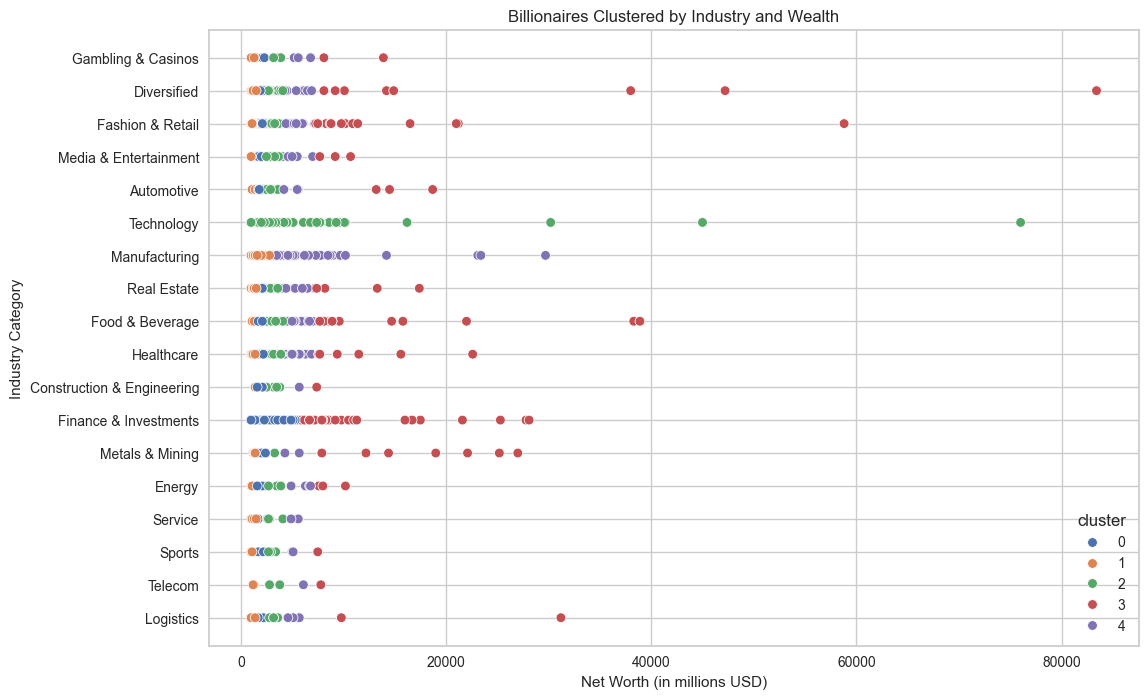

In [9]:
# Cluster summary
cluster_summary = df.groupby('cluster').agg({
    'finalWorth': 'mean',
    'category': lambda x: x.value_counts().index[0]
}).reset_index()
print(cluster_summary)

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='finalWorth', y='category', hue='cluster', palette='deep')
plt.title('Billionaires Clustered by Industry and Wealth')
plt.xlabel('Net Worth (in millions USD)')
plt.ylabel('Industry Category')
plt.show()